**Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import** **Libraries**

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

LOAD DATAset

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


**Define the features and the targe**t

In [6]:
X = data[["Designation", "Resource Allocation", "Mental Fatigue Score"]] # features
y = data["Burn Rate"] # target

In [17]:
X

,Designation,Resource Allocation,Mental Fatigue Score
0,2.0,3.0,3.8
1,1.0,2.0,5.0
2,2.0,NaN,5.8
3,1.0,1.0,2.6
4,3.0,7.0,6.9
...,...,...,...
22745,1.0,3.0,NaN
22746,3.0,6.0,6.7
22747,3.0,7.0,NaN
22748,2.0,5.0,5.9


In [18]:
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

**Preprocessing**

In [22]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop Employee ID column
    df = df.drop('Employee ID', axis=1)
    
    # Drop rows with missing target values
    missing_target_rows = df.loc[df['Burn Rate'].isna(), :].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Fill remaining missing values with column means
    for column in ['Resource Allocation', 'Mental Fatigue Score']:
        df[column] = df[column].fillna(df[column].mean())

# Extract date features
    df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
    df['Join Month'] = df['Date of Joining'].apply(lambda x: x.month)
    df['Join Day'] = df['Date of Joining'].apply(lambda x: x.day)
    df = df.drop('Date of Joining', axis=1)

    # Binary encoding
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['Company Type'] = df['Company Type'].replace({'Product': 0, 'Service': 1})
    df['WFH Setup Available'] = df['WFH Setup Available'].replace({'No': 0, 'Yes': 1})
    
    # Split df into X and y
    y = df['Burn Rate']
    X = df.drop('Burn Rate', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [56]:
X_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Join Month,Join Day
8275,-0.954022,-1.379211,-1.087295,0.725025,0.768001,0.475128,0.433442,-0.649693
21284,1.048194,0.725052,-1.087295,1.604608,1.270205,1.131455,1.596251,-0.536187
16802,1.048194,0.725052,-1.087295,-0.154557,0.768001,0.420434,1.305549,0.371860
3271,1.048194,-1.379211,-1.087295,1.604608,2.274612,1.733089,0.142739,1.620424
5302,-0.954022,-1.379211,-1.087295,-0.154557,-0.236406,0.475128,0.724144,-0.422682
...,...,...,...,...,...,...,...,...
10955,-0.954022,0.725052,-1.087295,-0.154557,0.768001,0.803292,-1.020070,-1.444234
17289,-0.954022,0.725052,0.919713,0.725025,-0.236406,-0.509363,-0.147963,0.712377
5192,-0.954022,0.725052,0.919713,0.725025,0.265797,-1.165690,1.014847,0.031342
12172,1.048194,-1.379211,0.919713,-1.913723,-1.743017,-1.220384,0.433442,-1.671246


In [57]:
y_train

8275     0.61
21284    0.81
16802    0.62
3271     0.73
5302     0.43
         ... 
10955    0.58
17289    0.39
5192     0.24
12172    0.18
235      0.00
Name: Burn Rate, Length: 15138, dtype: float64

**Create a regression model and fit it with existing data**

In [27]:
reg = LinearRegression().fit(X_train, y_train)

**Check the coefficients and the intercept of the model**

In [28]:
print(reg.coef_)
print(reg.intercept_)

[ 0.00326134  0.00034996 -0.00817894  0.01000201  0.06284658  0.12218851
 -0.00034051 -0.00070782]
0.45177632448143745


In [38]:
X_test.shape

(6488, 8)

In [39]:
X_train.shape

(15138, 8)

In [40]:
y_train.shape

(15138,)

In [41]:
y_test.shape

(6488,)

**Train DATA**

In [31]:
models = {
    "Linear Regression": LinearRegression()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Linear Regression trained.


**Result**

In [32]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

Linear Regression R^2 Score: 0.87075


**Evaluate model performance using RMSE**

In [53]:

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = model.score(X_test, y_test)
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

RMSE: 0.0713
R-squared: 0.8707


**Predict burnout rate**

In [46]:
# Predict the burn out rate for a new employee
new_employee = np.array([[1,0,1,3, 6, 7,5,4]]) # Designation = 3, Resource Allocation = 6, Mental Fatigue Score = 7
predicted_burn_rate = reg.predict(new_employee)
print(predicted_burn_rate)

[1.70472993]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
print(reg.n_features_in_)
print(reg.feature_names_in_)

8
['Gender' 'Company Type' 'WFH Setup Available' 'Designation'
 'Resource Allocation' 'Mental Fatigue Score' 'Join Month' 'Join Day']


In [52]:
# Provide the values and names of the features for the new employee
new_employee = pd.DataFrame([[0.5, 1, 0.8, 3 , 6, 7, 0.9, 0.7]], columns=["Gender", "Company Type", "WFH Setup Available","Designation", "Resource Allocation", "Mental Fatigue Score",  "Join Month", "Join Day"])

# Predict the burnout rate for the new employee
predicted_burn_rate = reg.predict(new_employee)
print(predicted_burn_rate)

[1.7088169]


**Graph**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [60]:
y_pred = reg.predict(X_test)

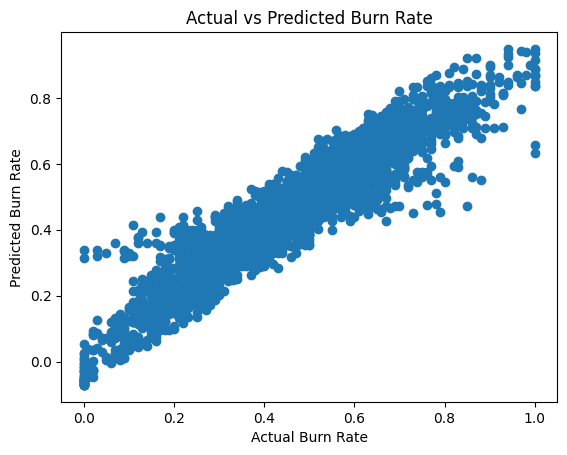

In [61]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Actual vs Predicted Burn Rate")
plt.show()